In [1]:
from osgeo import gdal
import affine
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

import context
import pymagery

import affine


In [2]:
arr = np.array([[1, 0, 1, 2],
                [0, 1, 0, 3],
                [1, 0, 2, 4]], dtype=np.float64)

band = pymagery.Band(arr)

aff = affine.Affine(1, 0, 10, 0, -1, 20)

In [3]:
sb =  pymagery.SingleBand(band=band, aff=aff)
dem_path = context.dem_paths[0]
dem = pymagery.SingleBand.from_path(dem_path)

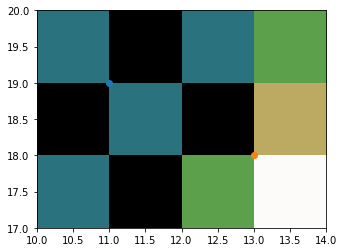

In [4]:
pix_locs = [
    (1, 1), (2, 3)
]
geo_locs = [sb.pix_to_geo(i, j) for i, j in pix_locs]

fig, ax = plt.subplots()
sb.plot(ax=ax)
for (i, j), (x, y) in zip(pix_locs, geo_locs):
    ax.scatter(x, y)
plt.show()

In [8]:
dem.arr[60:62, 60:62]

array([[[1064.56005859],
        [1064.55004883]],

       [[1064.56005859],
        [1064.57995605]]])

In [14]:
dem.arr[:, :, 0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [10]:
dem.mk_hill_shade()

[[[904.2800293]
  [904.2800293]
  [904.2800293]
  ...
  [904.2800293]
  [904.2800293]
  [904.2800293]]

 [[904.2800293]
  [904.2800293]
  [904.2800293]
  ...
  [904.2800293]
  [904.2800293]
  [904.2800293]]

 [[904.2800293]
  [904.2800293]
  [904.2800293]
  ...
  [904.2800293]
  [904.2800293]
  [904.2800293]]

 ...

 [[904.2800293]
  [904.2800293]
  [904.2800293]
  ...
  [904.2800293]
  [904.2800293]
  [904.2800293]]

 [[904.2800293]
  [904.2800293]
  [904.2800293]
  ...
  [904.2800293]
  [904.2800293]
  [904.2800293]]

 [[904.2800293]
  [904.2800293]
  [904.2800293]
  ...
  [904.2800293]
  [904.2800293]
  [904.2800293]]]


TypeError: invalid number of arguments

In [ ]:
raise

In [ ]:
# interp
interpd = band.interp()
# preserve original?
assert np.isnan(band[0, 0])
# new value correct?
neighbors = np.array([band[1, 0], band[0, 1], band[1, 1]])
weights = np.array([1, 1, 1 / np.sqrt(2)])
assert np.isclose(interpd[0, 0], np.sum(weights * neighbors) / np.sum(weights), rtol=1e-4)

In [ ]:
import rasterio as rio

In [ ]:
rio_raster = rio.open(path)
raster = rio_raster.read_masks()

In [ ]:
raster = rio_raster.read_transform

In [ ]:
bands = rio_raster.read()
n_bands, N, M = bands.shape
im = np.stack(bands[:3], axis=2)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im)